In [2]:
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.gridspec as gridspec
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import platform
import re
import matplotlib as mpl
from matplotlib import font_manager as fm

In [3]:
font_location = 'C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc' 
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [4]:
df=pd.read_csv('기업.csv')
df.drop(axis=1,columns='Unnamed: 0',inplace=True)
df_before=pd.read_csv('total.csv')

In [5]:
df_before.columns

Index(['Unnamed: 0', '기업형태', '업종', '창업자 학력', '창업횟수', '창업인원', '창업교육 경험',
       '창업 시 소요자금(천원)', '창업자금의 조달방법(1)', '창업자금의 조달방법(2)', '창업자금의 조달방법(3)',
       '창업자금의 조달방법(4)', '창업자금의 조달방법(5)', '창업자금의 조달방법(6)', '창업이후 필요자금 조달방법(1)',
       '창업이후 필요자금 조달방법(2)', '창업이후 필요자금 조달방법(3)', '창업이후 필요자금 조달방법(4)',
       '창업이후 필요자금 조달방법(5)', '창업이후 필요자금 조달방법(6)', '창업이후 필요자금 조달방법(7)', '사업장 입지',
       '자산대비 자본%', '자산대비 부채%', '매출액', '매출액 비중', '영업이익', '영업이익 비중',
       '금융비용(이자비용)', '금융비용(이자비용)비중', '당기순이익', '당기순이익 비중', 'B2B 기업 매출(%)',
       'B2C 소비자 매출(%)', 'B2G 정부 매출(%)', '연간 자금 사용금액', '전체 인력', '산업재산권 보유건수',
       '연구개발전담부서 및 연구개발인력 보유여부', '위탁영업 여부', '홍보마케팅 방법(1)', '홍보마케팅 방법(2)',
       '홍보마케팅 방법(3)', '홍보마케팅 방법(4)', '홍보마케팅 방법(5)', '홍보마케팅 방법(6)',
       '홍보마케팅 방법(7)', '해외진출여부'],
      dtype='object')

In [6]:
df.columns = ['기업형태', '창업자_학력', '창업횟수', '창업인원', '창업교육_경험', 
              '창업자금의_조달방법_1', '창업자금의_조달방법_2', '창업자금의_조달방법_3', '창업자금의_조달방법_4', '창업자금의_조달방법_5', '창업자금의_조달방법_6',
              '창업이후_필요자금_조달방법_1', '창업이후_필요자금_조달방법_2', '창업이후_필요자금_조달방법_3', '창업이후_필요자금_조달방법_4', '창업이후_필요자금_조달방법_5',
              '창업이후_필요자금_조달방법_6', '창업이후_필요자금_조달방법_7', '사업장_입지', 'B2B_기업_매출_pct',
              'B2C_소비자_매출_pct', 'B2G_정부_매출_pct', '전체_인력', '위탁영업_여부', '해외진출여부',
              '홍보마케팅_유무', '연구인력_보유여부', '산업재산권_보유여부', '매출순이익률', '자산대비_자금사용비율']


In [7]:
df['영업이익']=df_before['영업이익']
df['당기순이익']=df_before['당기순이익']
df['매출액']=df_before['매출액']

In [8]:
capital_after=['창업이후_필요자금_조달방법_1','창업이후_필요자금_조달방법_2','창업이후_필요자금_조달방법_3',
          '창업이후_필요자금_조달방법_4','창업이후_필요자금_조달방법_5','창업이후_필요자금_조달방법_6',
          '창업이후_필요자금_조달방법_7']
capital_initial=[ '창업자금의_조달방법_1', '창업자금의_조달방법_2', '창업자금의_조달방법_3', '창업자금의_조달방법_4', '창업자금의_조달방법_5', '창업자금의_조달방법_6']

In [9]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

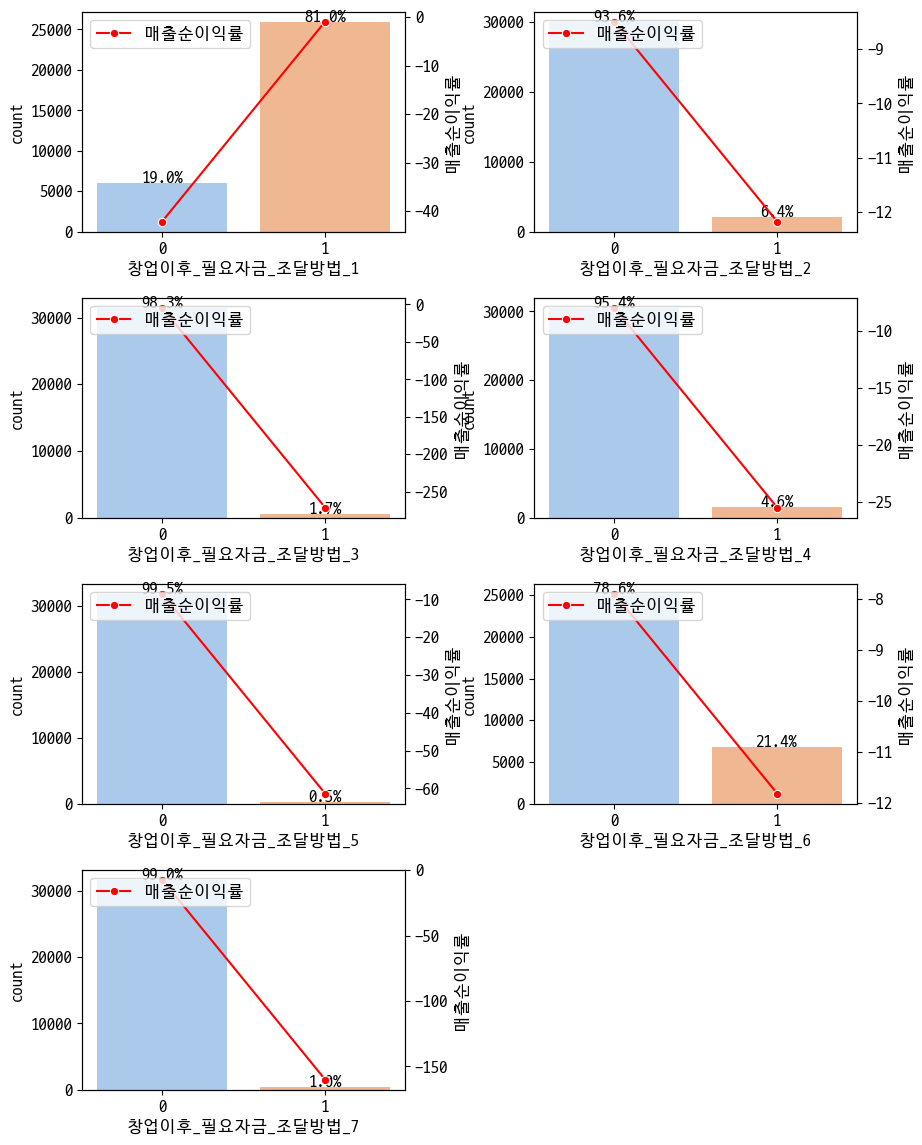

In [10]:
mpl.rc('font', size=12)
grid = gridspec.GridSpec(4, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 14))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features =  capital_after# 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=df,hue=feature,legend=False ,palette='pastel', ax=ax)
    
    # 당기순이익 라인 플롯 추가 (twinx 사용)
    ax2 = ax.twinx()
    sns.lineplot(x=feature, y='매출순이익률', data=df, marker='o', ax=ax2, color='red', errorbar=None)
    
    # 매출액 라인 플롯 추가 (twinx 사용)

    write_percent(ax, len(df))  # 퍼센트 주석 추가

    # 범례(legend) 설정
    ax2.legend(['매출순이익률'], loc='upper left')
plt.show()

In [11]:
df['창업이후_필요자금_조달방법_24']=df['창업이후_필요자금_조달방법_2']+df['창업이후_필요자금_조달방법_4']
df.drop(axis=1,columns='창업이후_필요자금_조달방법_3',inplace=True)
df.drop(axis=1,columns='창업이후_필요자금_조달방법_5',inplace=True)
df.drop(axis=1,columns='창업이후_필요자금_조달방법_7',inplace=True)
df.drop(axis=1,columns='창업이후_필요자금_조달방법_2',inplace=True)
df.drop(axis=1,columns='창업이후_필요자금_조달방법_4',inplace=True)
df = df.drop(df[df['창업이후_필요자금_조달방법_24'] > 1].index)

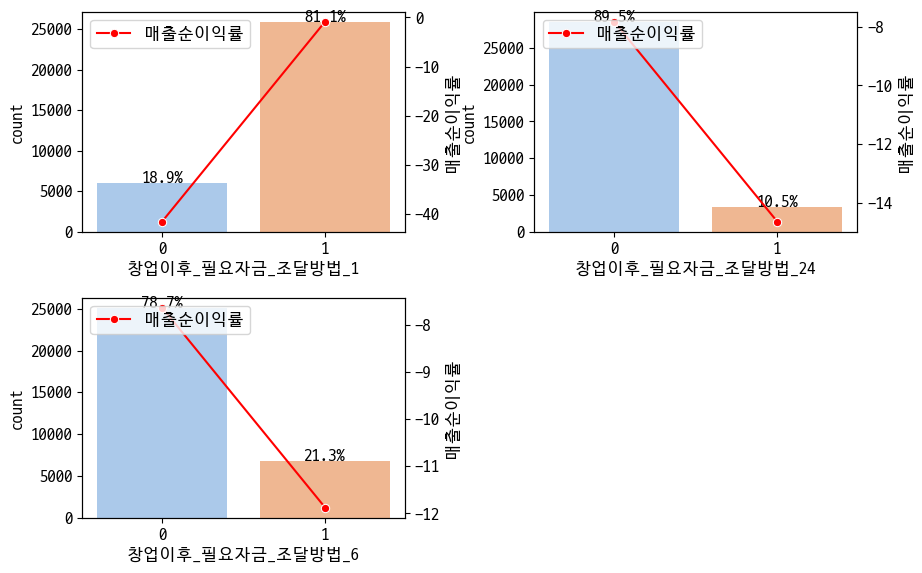

In [12]:
mpl.rc('font', size=12)
grid = gridspec.GridSpec(4, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 14))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features =  ['창업이후_필요자금_조달방법_1','창업이후_필요자금_조달방법_24','창업이후_필요자금_조달방법_6']# 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=df,hue=feature,legend=False ,palette='pastel', ax=ax)
    
    # 당기순이익 라인 플롯 추가 (twinx 사용)
    ax2 = ax.twinx()
    sns.lineplot(x=feature, y='매출순이익률', data=df, marker='o', ax=ax2, color='red', errorbar=None)
    
    # 매출액 라인 플롯 추가 (twinx 사용)

    write_percent(ax, len(df))  # 퍼센트 주석 추가

    # 범례(legend) 설정
    ax2.legend(['매출순이익률'], loc='upper left')
plt.show()

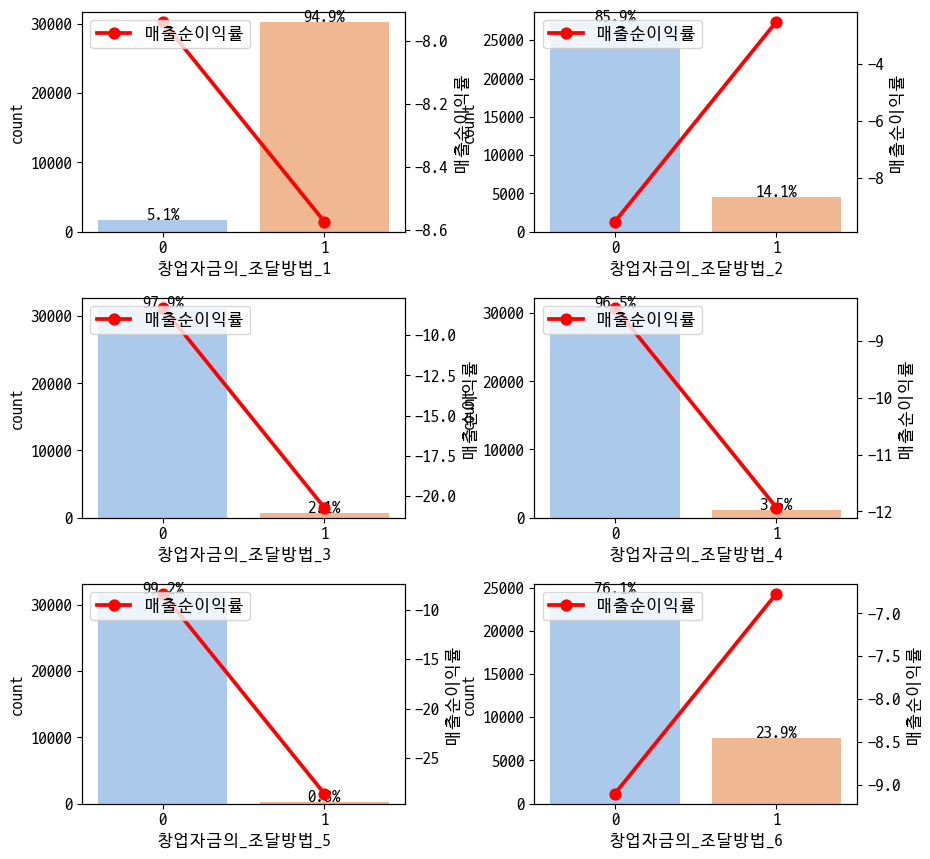

In [13]:
mpl.rc('font', size=12)
grid = gridspec.GridSpec(4, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 14))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features =  capital_initial# 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=df,hue=feature,legend=False ,palette='pastel', ax=ax)
    
    # 당기순이익 라인 플롯 추가 (twinx 사용)
    ax2 = ax.twinx()
    sns.pointplot(x=feature, y='매출순이익률', data=df, ax=ax2, color='red', errorbar=None)
    
    # 매출액 라인 플롯 추가 (twinx 사용)

    write_percent(ax, len(df))  # 퍼센트 주석 추가

    # 범례(legend) 설정
    ax2.legend(['매출순이익률'], loc='upper left')
plt.show()

In [14]:
df['창업자금의_조달방법_26']=df['창업자금의_조달방법_2']+df['창업자금의_조달방법_6']
df.drop(axis=1,columns='창업자금의_조달방법_2',inplace=True)
df.drop(axis=1,columns='창업자금의_조달방법_6',inplace=True)
df.drop(axis=1,columns='창업자금의_조달방법_3',inplace=True)
df.drop(axis=1,columns='창업자금의_조달방법_4',inplace=True)
df.drop(axis=1,columns='창업자금의_조달방법_5',inplace=True)
df = df.drop(df[df['창업자금의_조달방법_26'] > 1].index)

In [15]:
df.drop(axis=1,columns='B2B_기업_매출_pct',inplace=True)

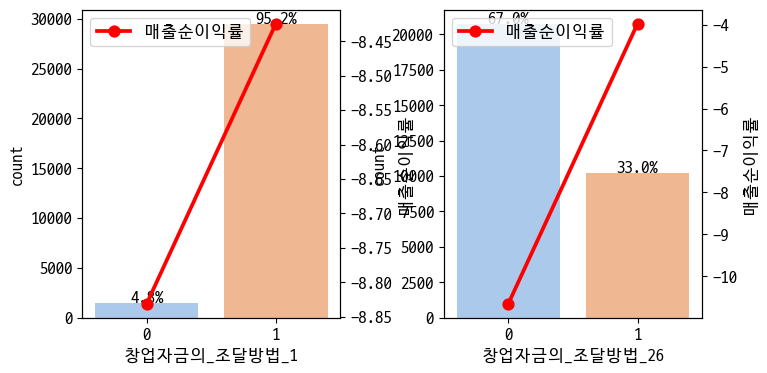

In [16]:
mpl.rc('font', size=12)
grid = gridspec.GridSpec(1, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(8, 4))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features =  ['창업자금의_조달방법_1','창업자금의_조달방법_26']# 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=df,hue=feature,legend=False ,palette='pastel', ax=ax)
    
    # 당기순이익 라인 플롯 추가 (twinx 사용)
    ax2 = ax.twinx()
    sns.pointplot(x=feature, y='매출순이익률', data=df, ax=ax2, color='red', errorbar=None)
    
    # 매출액 라인 플롯 추가 (twinx 사용)

    write_percent(ax, len(df))  # 퍼센트 주석 추가

    # 범례(legend) 설정
    ax2.legend(['매출순이익률'], loc='upper left')
plt.show()

In [17]:
list_else = [col for col in df.columns if col not in capital_after and col not in capital_initial]
list_else=[col for col in list_else if col not in ['창업이후_필요자금_조달방법_24','창업자금의_조달방법_26']]
list_else

['기업형태',
 '창업자_학력',
 '창업횟수',
 '창업인원',
 '창업교육_경험',
 '사업장_입지',
 'B2C_소비자_매출_pct',
 'B2G_정부_매출_pct',
 '전체_인력',
 '위탁영업_여부',
 '해외진출여부',
 '홍보마케팅_유무',
 '연구인력_보유여부',
 '산업재산권_보유여부',
 '매출순이익률',
 '자산대비_자금사용비율',
 '영업이익',
 '당기순이익',
 '매출액']

In [18]:
df[list_else].describe()

기업형태        창업자_학력          창업횟수          창업인원       창업교육_경험  \
count  30928.000000  30928.000000  30928.000000  30928.000000  30928.000000   
mean       0.499547      3.158562      1.307359      1.259635      0.130109   
std        0.500008      1.194511      0.581069      0.867254      0.336428   
min        0.000000      1.000000      1.000000      1.000000      0.000000   
25%        0.000000      2.000000      1.000000      1.000000      0.000000   
50%        0.000000      4.000000      1.000000      1.000000      0.000000   
75%        1.000000      4.000000      2.000000      1.000000      0.000000   
max        1.000000      6.000000      8.000000     30.000000      1.000000   

             사업장_입지  B2C_소비자_매출_pct  B2G_정부_매출_pct         전체_인력  \
count  30928.000000    30928.000000   30928.000000  30928.000000   
mean       3.382598       55.415222       3.906234      6.880755   
std        0.962848       47.978517      17.618680     20.532451   
min        1.000000        0.000000       0.000000      0.000000   
25%        3.000000        0.000000       0.000000      0.000000   
50%        3.000000      100.000000       0.000000      2.000000   
75%        4.000000      100.000000       0.000000      7.000000   
max        5.000000      100.000000     100.000000    890.000000   

            위탁영업_여부        해외진출여부      홍보마케팅_유무     연구인력_보유여부    산업재산권_보유여부  \
count  30928.000000  30928.000000  30928.000000  30928.000000  30928.000000   
mean       0.094348      0.053576      0.210618      0.079281      0.049017   
std        0.292317      0.225183      0.407754      0.270181      0.215907   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              매출순이익률   자산대비_자금사용비율          영업이익         당기순이익           매출액  
count   30928.000000  3.092800e+04  8.759000e+03  8.758000e+03  8.759000e+03  
mean       -8.443988  7.437201e+03  1.009224e+05  5.945900e+04  1.409723e+06  
std      1343.484787  8.613908e+04  9.920232e+05  7.039762e+05  4.726740e+06  
min   -134000.000000  0.000000e+00 -2.591450e+07 -2.649030e+07  1.000000e+03  
25%         0.819400  4.100000e+01  2.800000e+03  1.400000e+03  7.800000e+04  
50%         3.750000  1.477778e+02  1.690000e+04  8.450000e+03  3.180000e+05  
75%         9.610020  7.737281e+02  6.792850e+04  4.139000e+04  1.034000e+06  
max    155990.000000  7.048120e+06  5.269379e+07  2.314424e+07  1.426170e+08

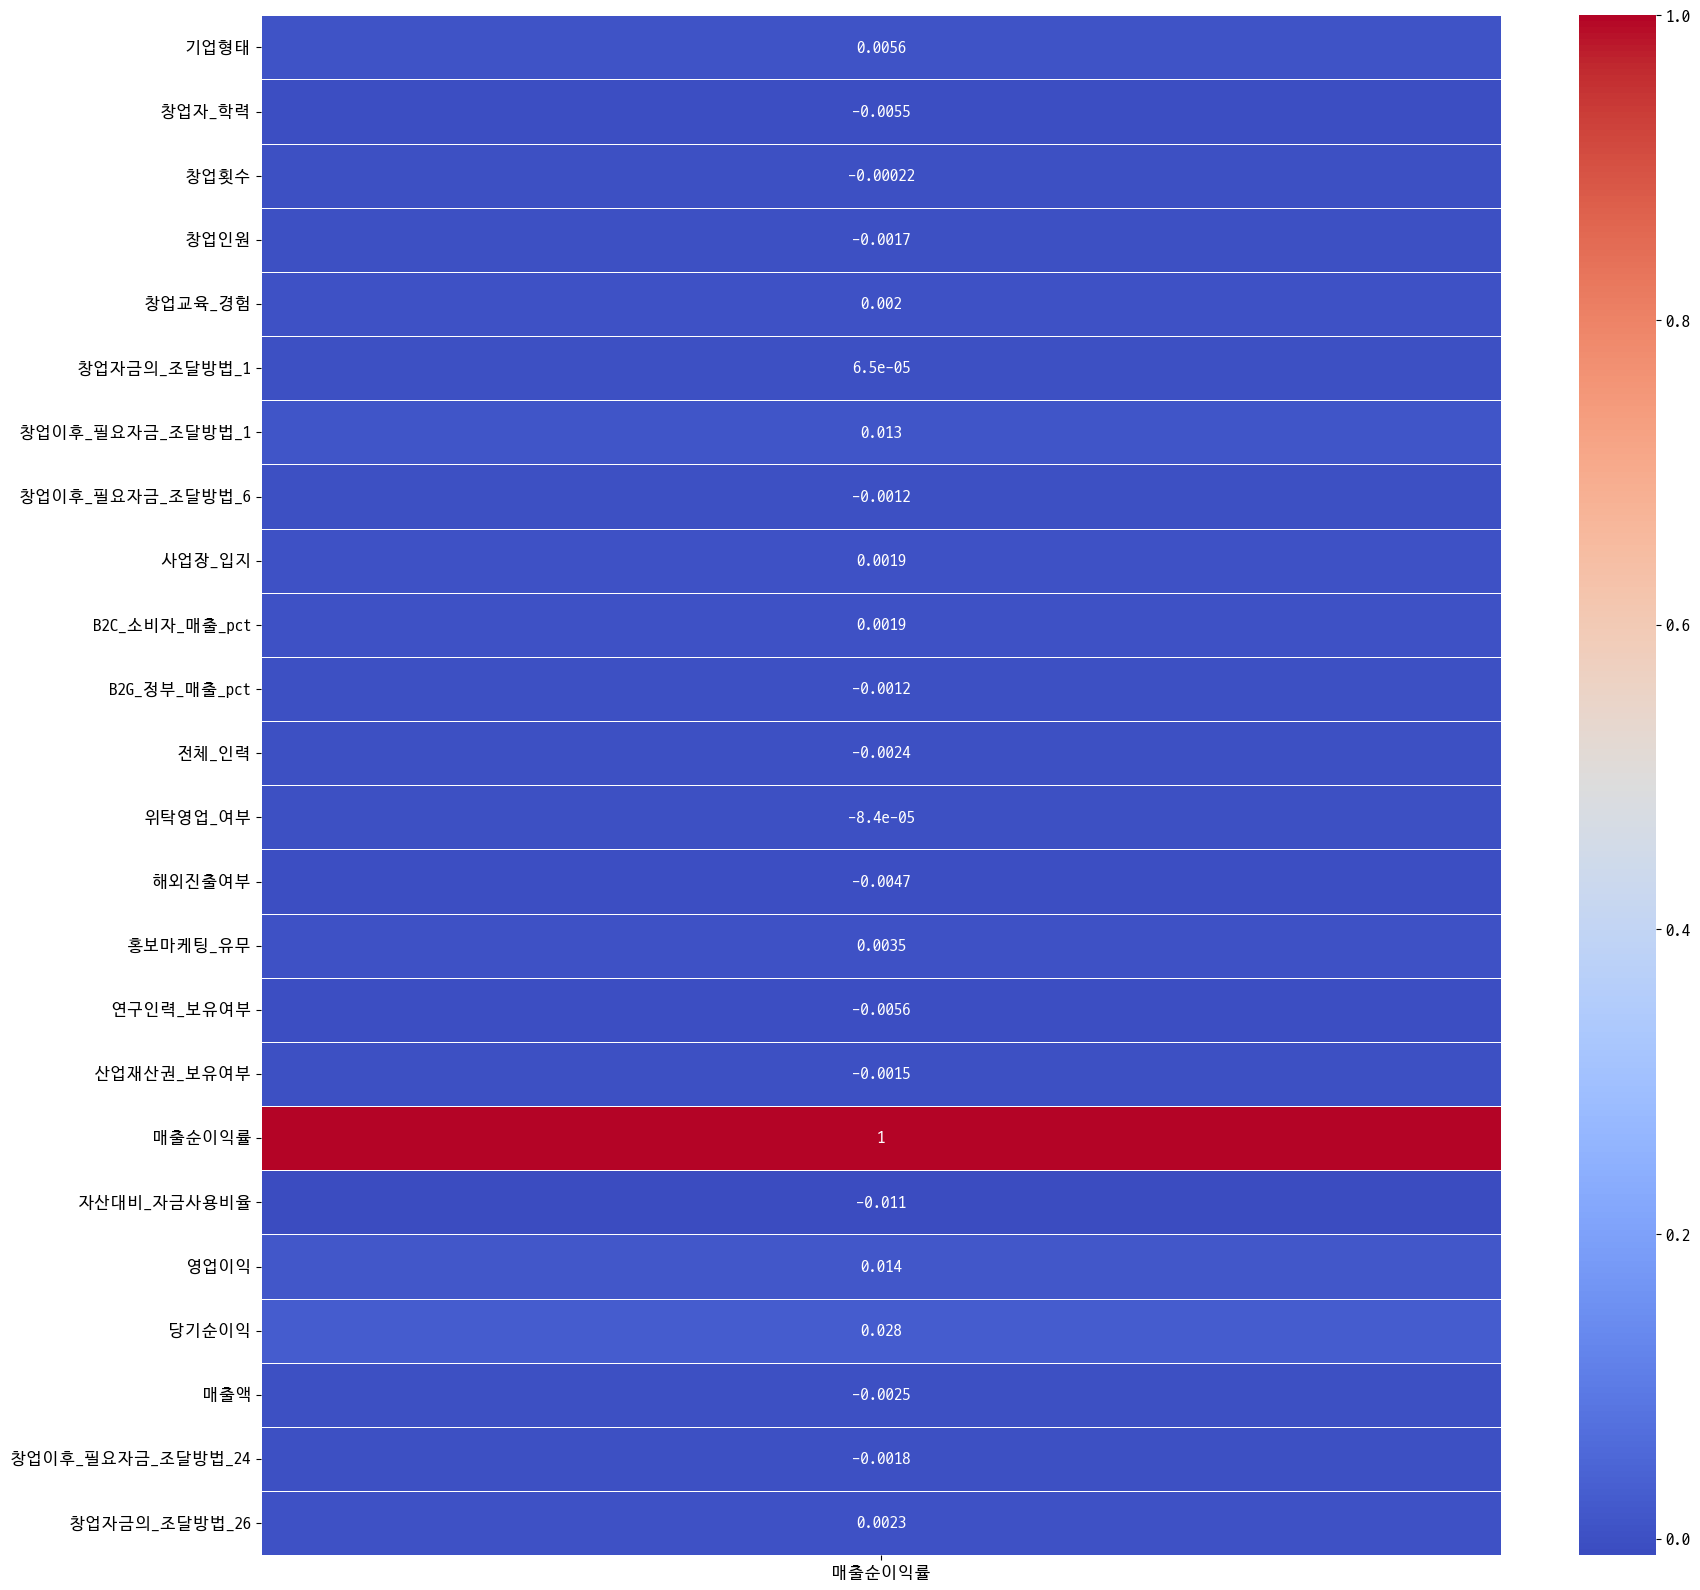

In [19]:
# '점포당 매출액'과 '매출액' 간의 상관관계 계산
correlation_sales = df.corr()['매출순이익률'].to_frame()
plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.show()

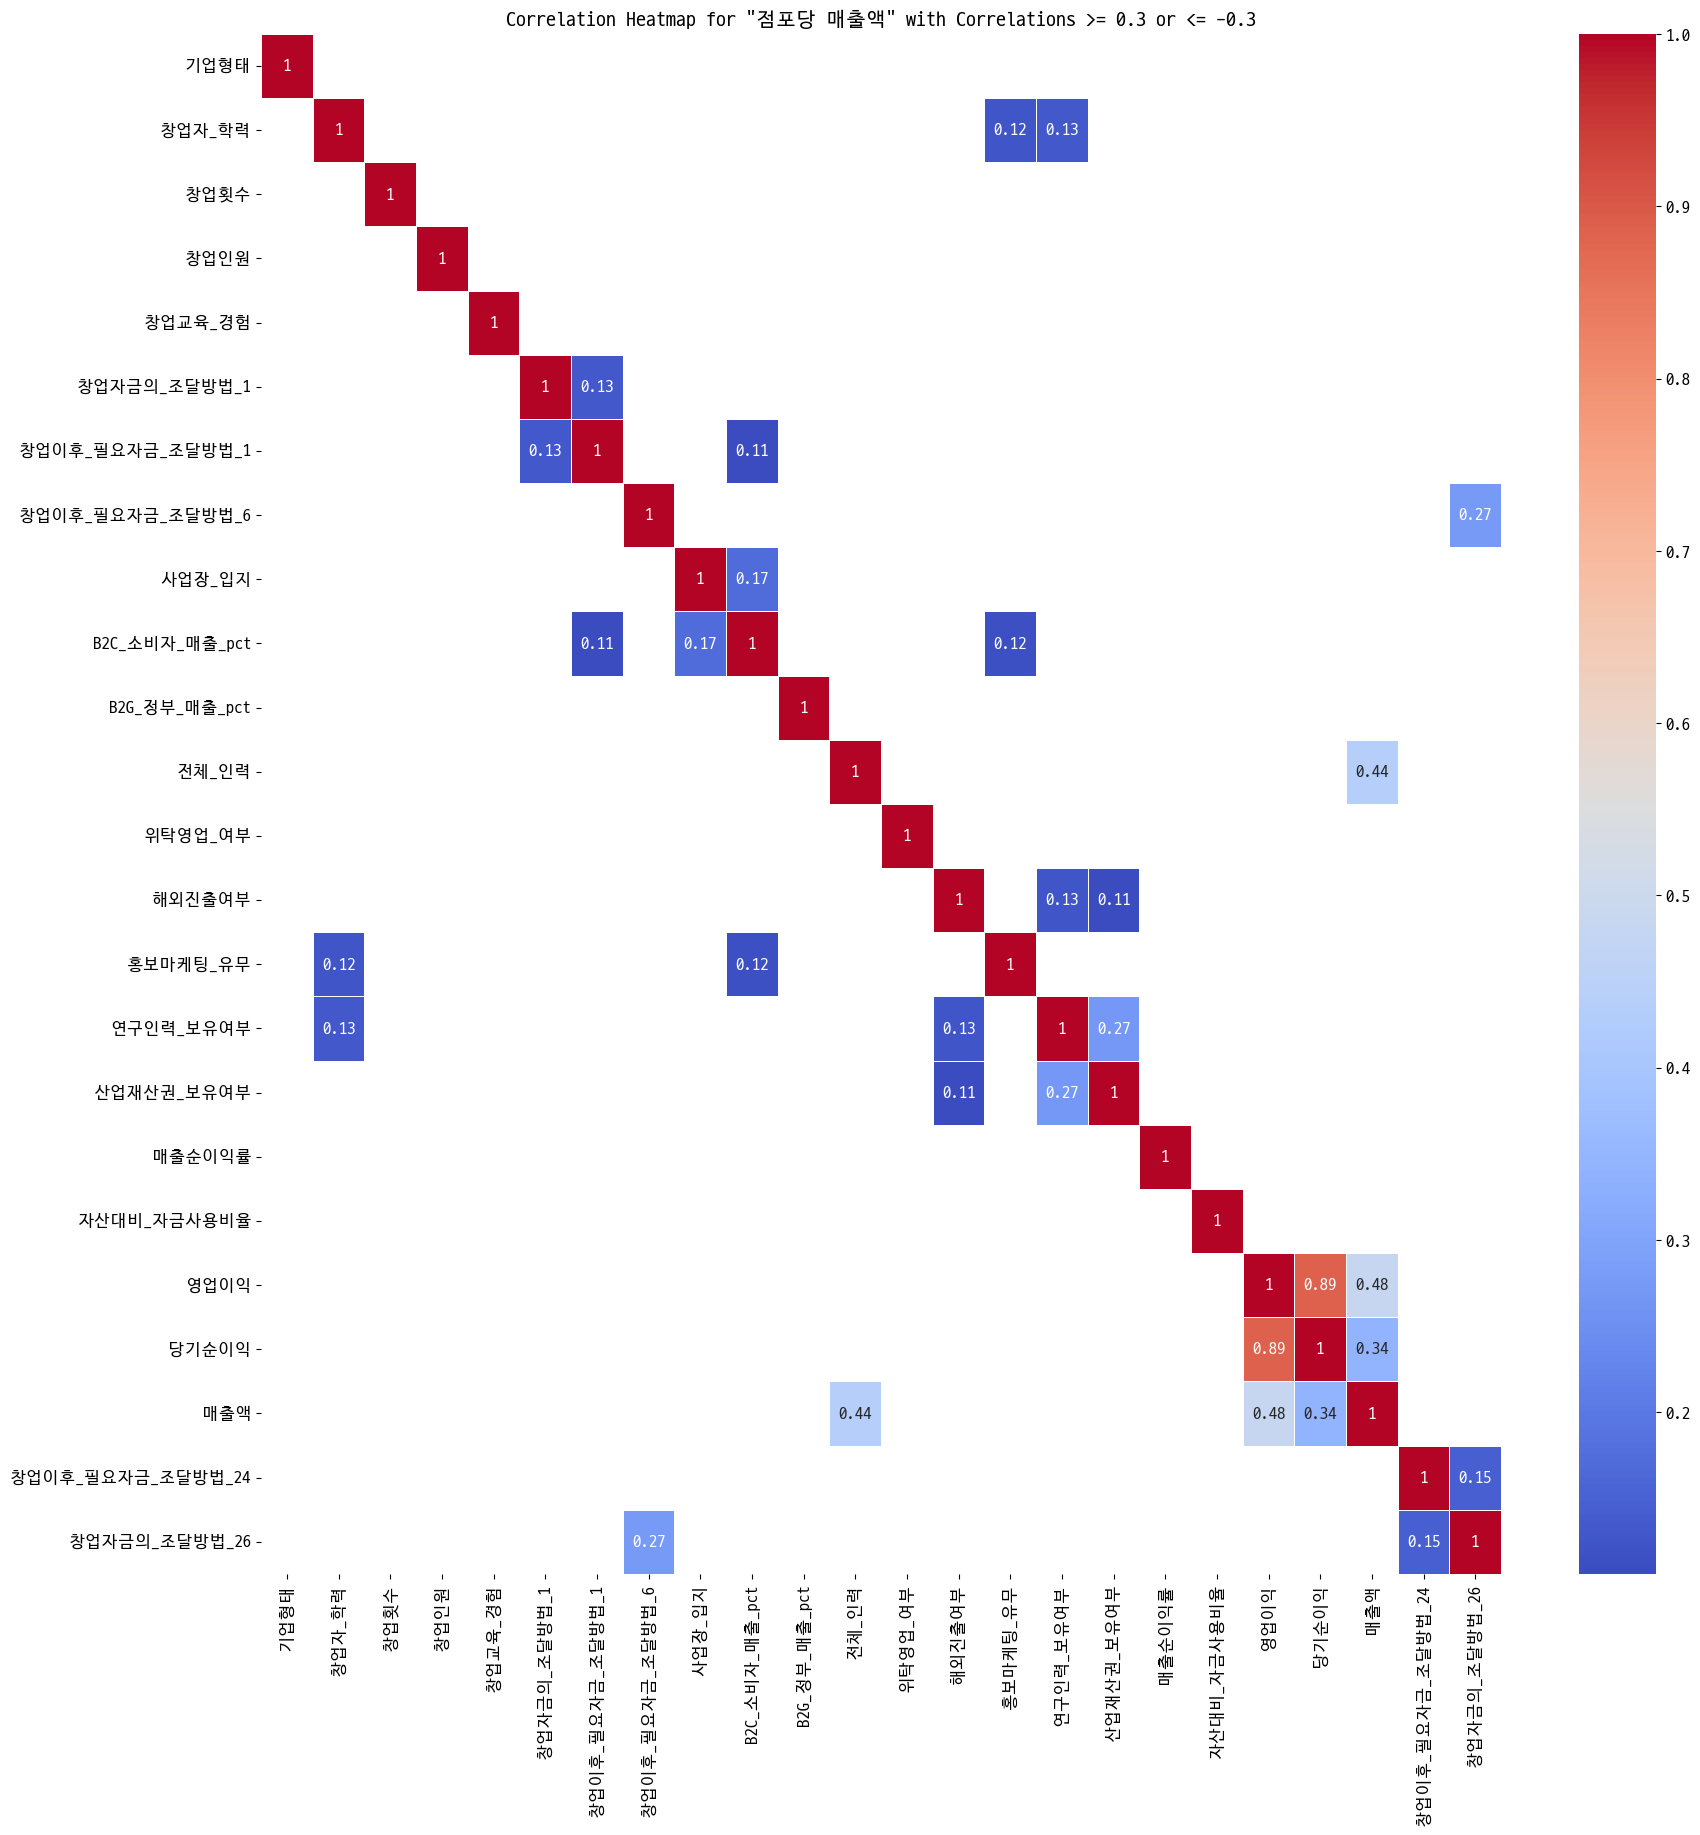

In [20]:
correlation_sales = df.corr()

# 0.4 미만이고 -0.4 초과인 상관계수는 NaN으로 변경
correlation_sales = correlation_sales.where(correlation_sales >= 0.1, other=np.nan)

plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.title('Correlation Heatmap for "점포당 매출액" with Correlations >= 0.3 or <= -0.3')
plt.show()

In [21]:
df['창업자금의_조달방법_통합1']=df['창업자금의_조달방법_26']+df['창업이후_필요자금_조달방법_6']+df['창업이후_필요자금_조달방법_24']
df['산업재산권_연구인력_보유여부']=df['산업재산권_보유여부']+df['연구인력_보유여부']
df['창업자금의_조달방법_통합2']=df['창업자금의_조달방법_1']+df['창업이후_필요자금_조달방법_1']
df.drop(axis=True,columns=['창업자금의_조달방법_1','창업이후_필요자금_조달방법_1'],inplace=True)
df.drop(axis=True,columns=['창업자금의_조달방법_26','창업이후_필요자금_조달방법_6','창업이후_필요자금_조달방법_24'],inplace=True)
df.drop(axis=True,columns=['산업재산권_보유여부','연구인력_보유여부'],inplace=True)

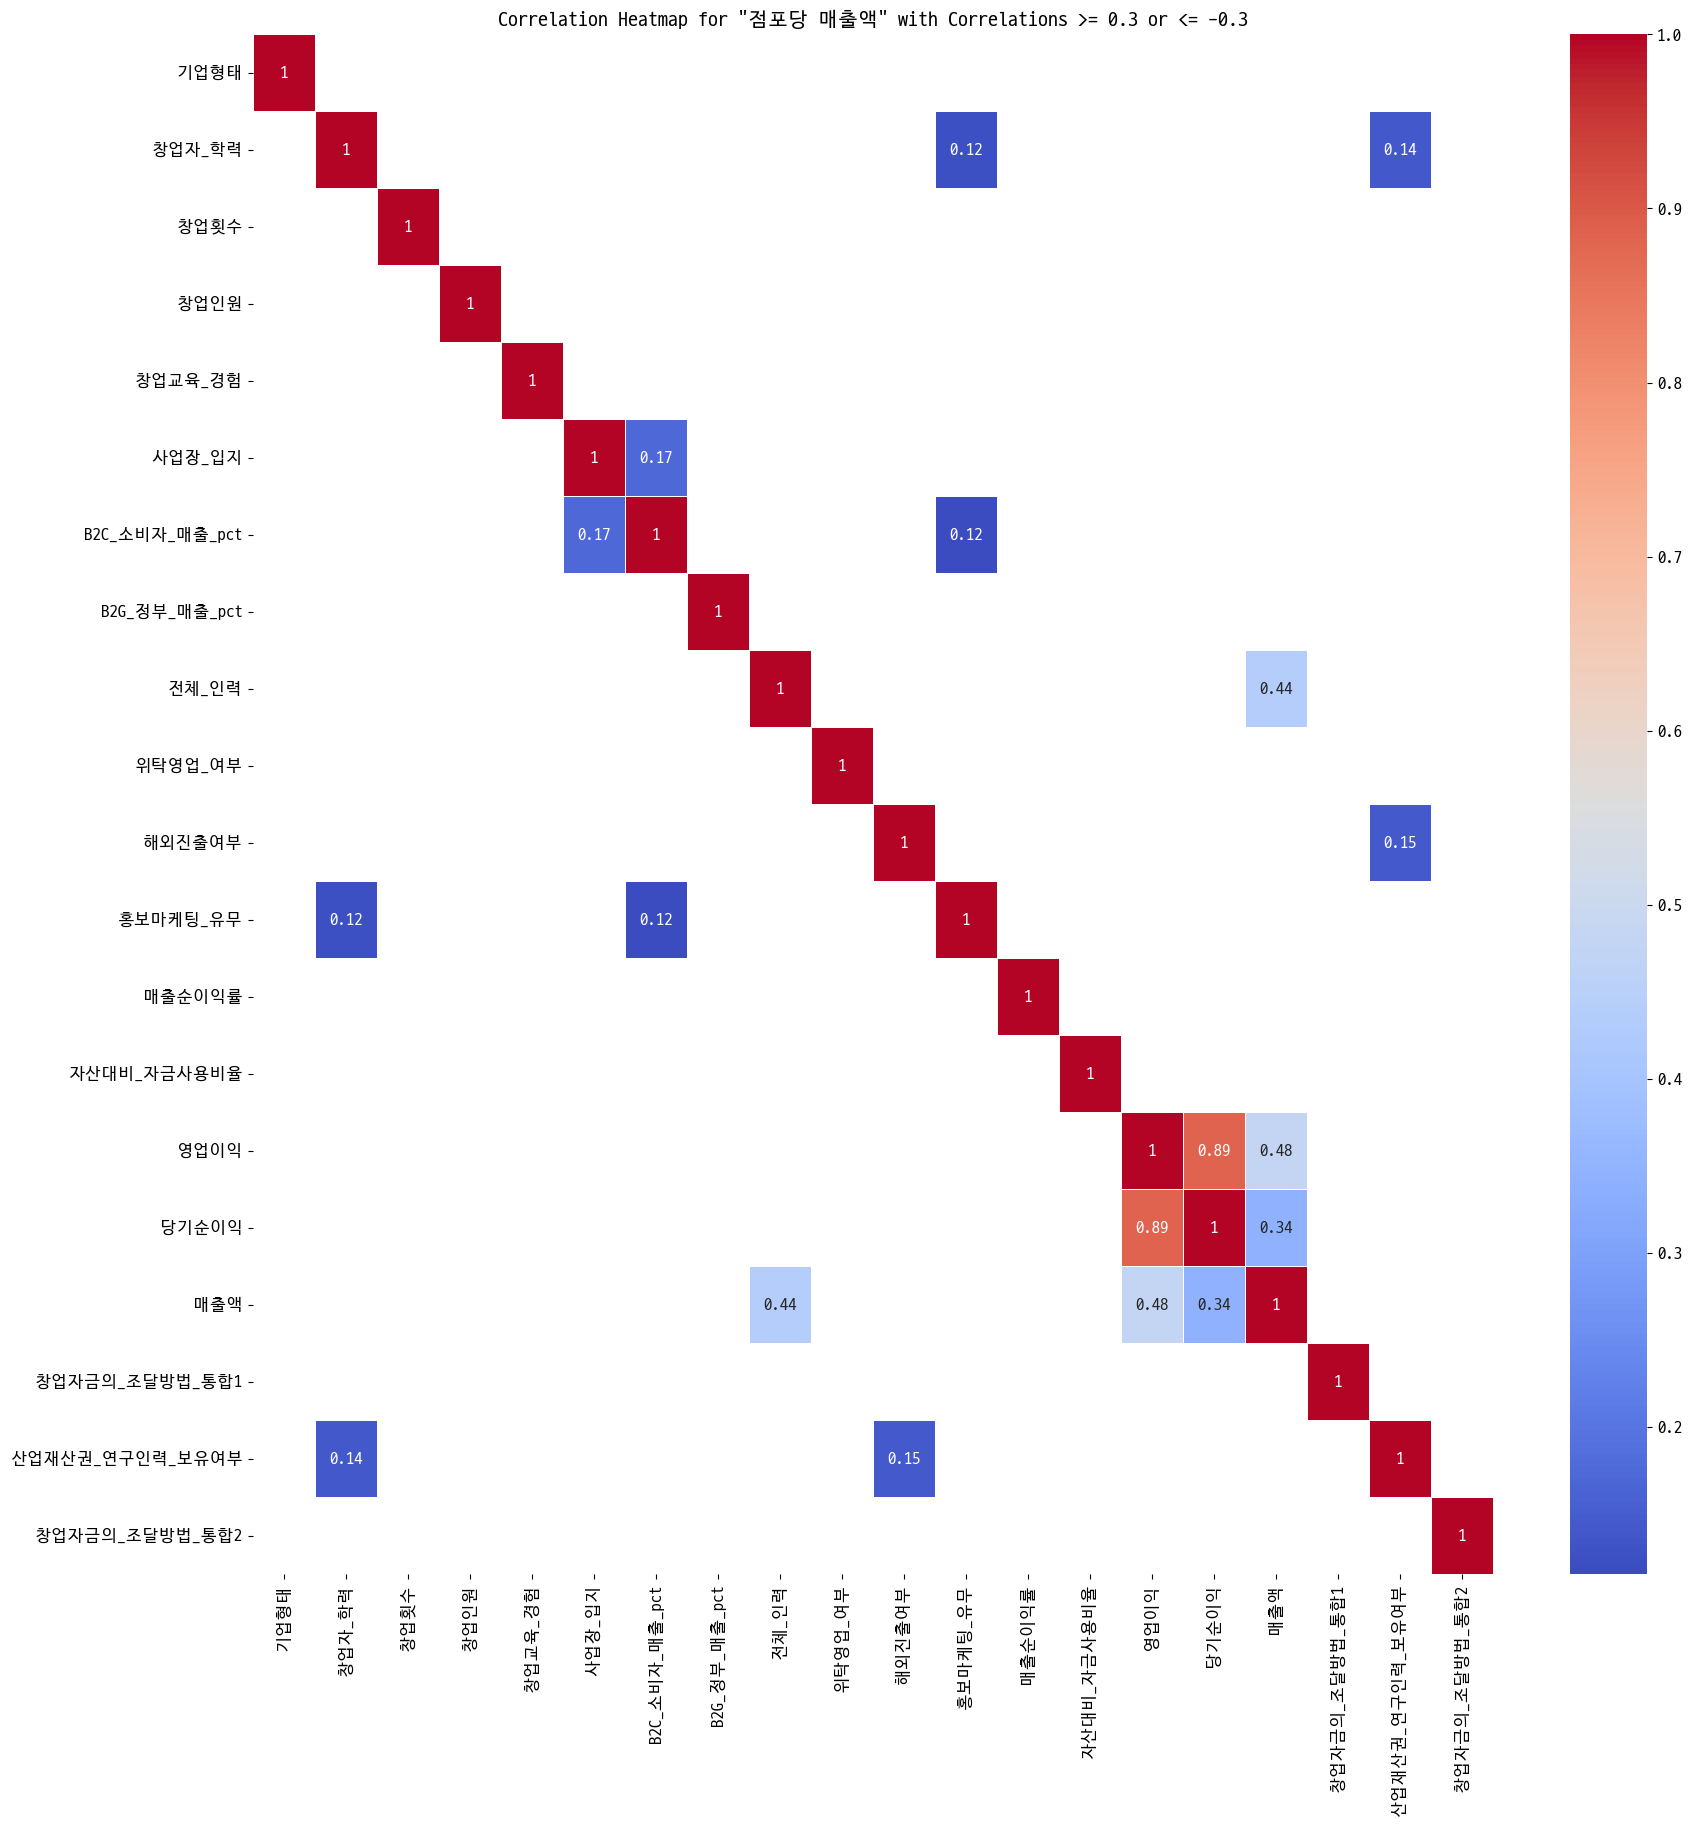

In [22]:
correlation_sales = df.corr()

# 0.4 미만이고 -0.4 초과인 상관계수는 NaN으로 변경
correlation_sales = correlation_sales.where(correlation_sales >= 0.1, other=np.nan)

plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.title('Correlation Heatmap for "점포당 매출액" with Correlations >= 0.3 or <= -0.3')
plt.show()

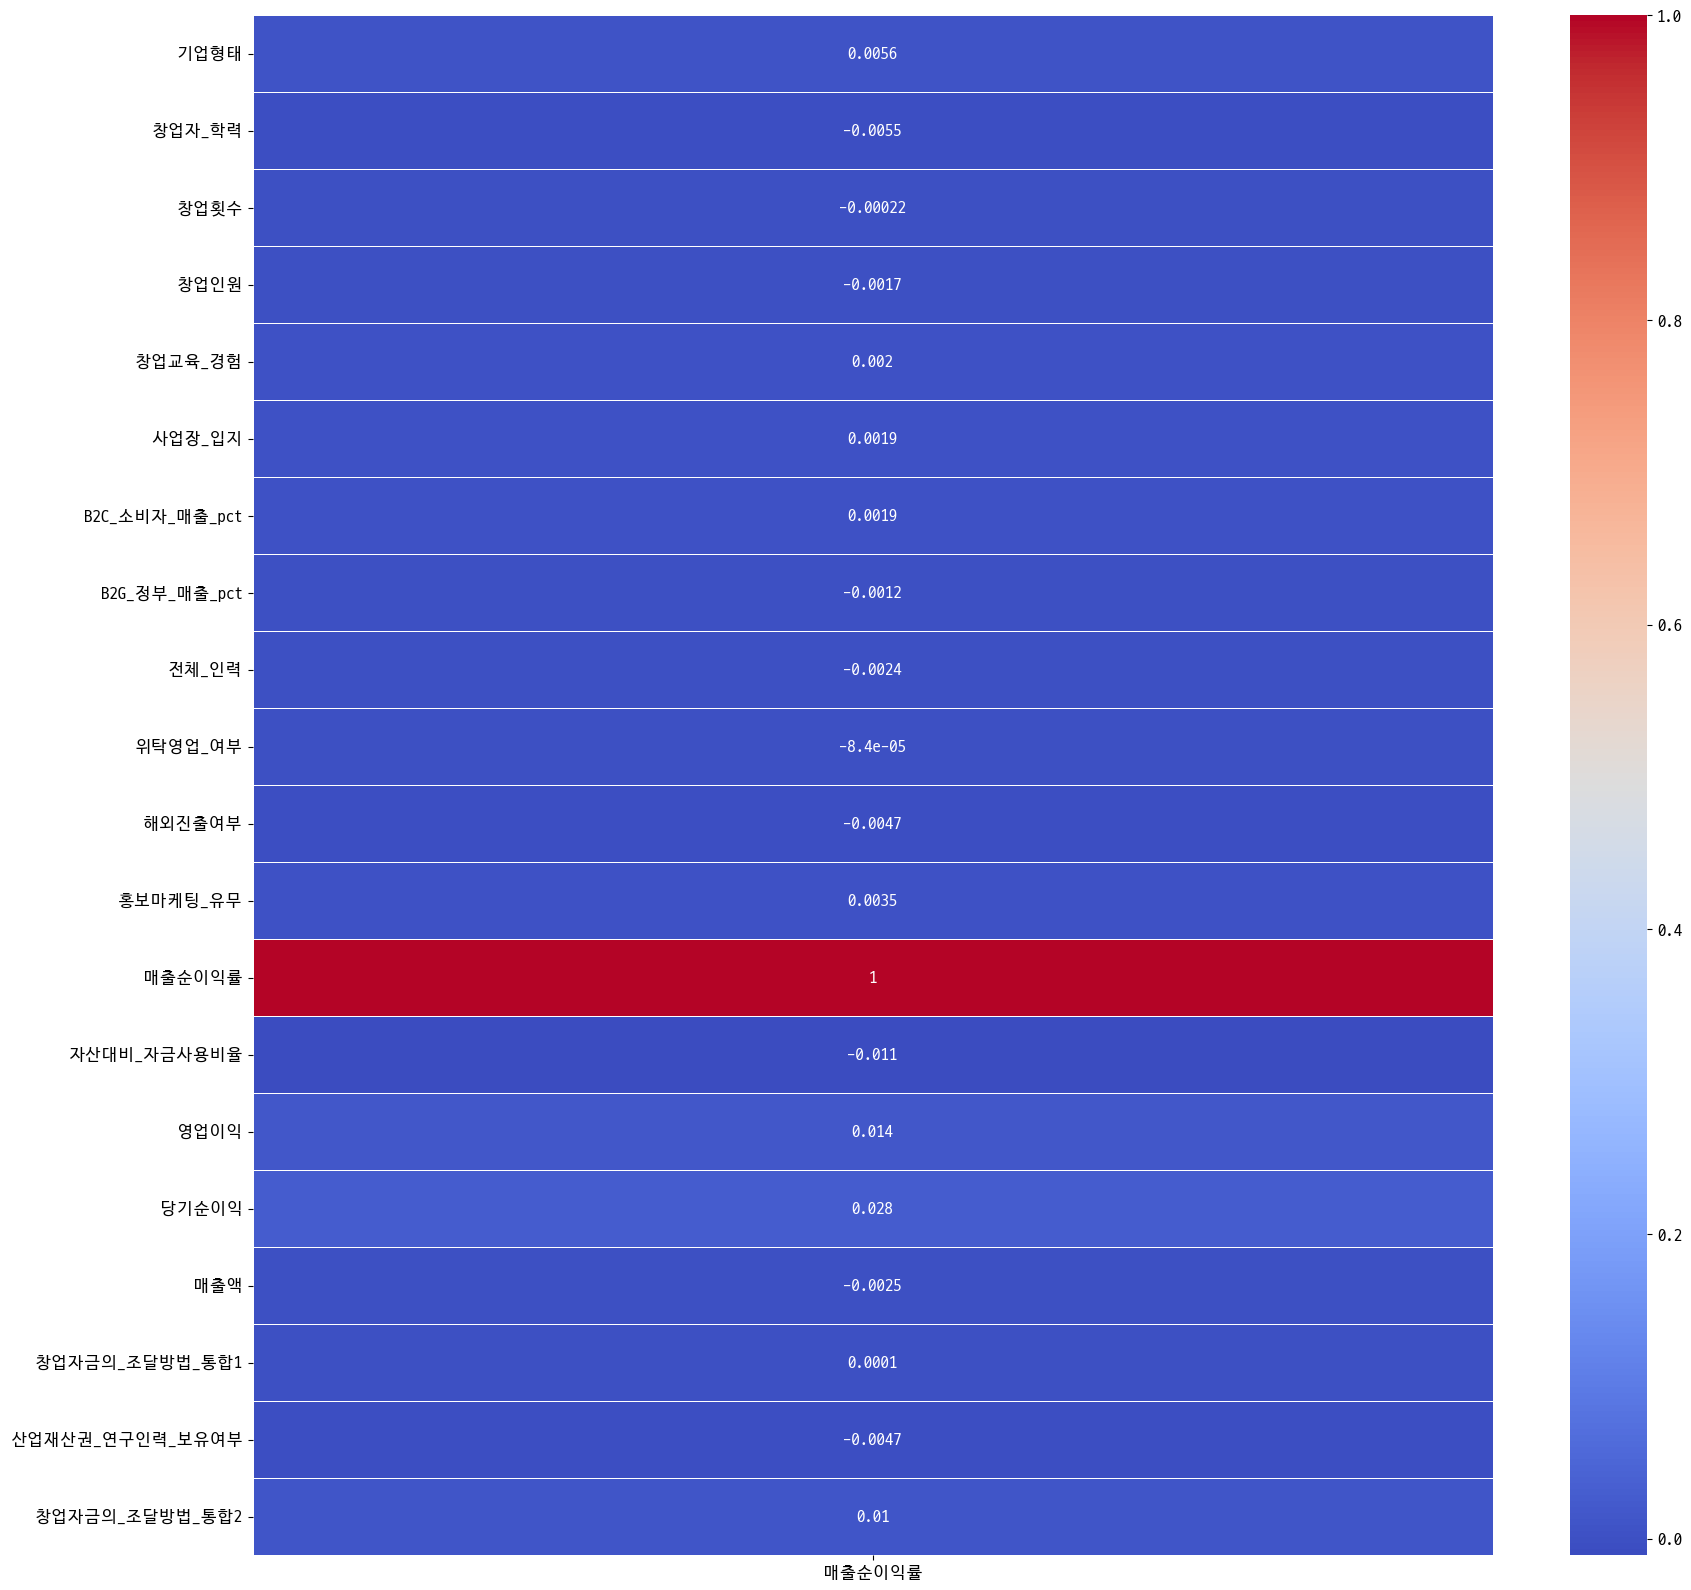

In [23]:
correlation_sales = df.corr()['매출순이익률'].to_frame()
plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.show()

In [24]:
def remove_outliers_zscore(data, threshold=3):
    """
    Z-score를 이용하여 이상치를 제거하는 함수

    Parameters:
    - data (pd.DataFrame or pd.Series): 이상치를 제거할 데이터
    - threshold (float): Z-score 임계값. 기본값은 3

    Returns:
    - cleaned_data (pd.DataFrame or pd.Series): 이상치가 제거된 데이터
    """
    if isinstance(data, pd.DataFrame):
        z_scores = np.abs((data - data.mean()) / data.std())
        cleaned_data = data[(z_scores < threshold).all(axis=1)]
    elif isinstance(data, pd.Series):
        z_scores = np.abs((data - data.mean()) / data.std())
        cleaned_data = data[z_scores < threshold]
    else:
        pass

    return cleaned_data

In [25]:
df1 = df.drop(df[df['매출순이익률'] == 0].index)
df1=remove_outliers_zscore(df1)

In [26]:
df=remove_outliers_zscore(df)
df.describe()

기업형태       창업자_학력         창업횟수         창업인원      창업교육_경험  \
count  6477.000000  6477.000000  6477.000000  6477.000000  6477.000000   
mean      0.588081     2.951058     1.267408     1.190675     0.119500   
std       0.492219     1.191609     0.493761     0.491358     0.324401   
min       0.000000     1.000000     1.000000     1.000000     0.000000   
25%       0.000000     2.000000     1.000000     1.000000     0.000000   
50%       1.000000     3.000000     1.000000     1.000000     0.000000   
75%       1.000000     4.000000     1.000000     1.000000     0.000000   
max       1.000000     6.000000     3.000000     3.000000     1.000000   

            사업장_입지  B2C_소비자_매출_pct  B2G_정부_매출_pct        전체_인력  위탁영업_여부  \
count  6477.000000     6477.000000    6477.000000  6477.000000   6477.0   
mean      3.405280       61.450363       0.681952     5.209356      0.0   
std       0.940242       46.929512       5.079431     7.576031      0.0   
min       1.000000        0.000000       0.000000     0.000000      0.0   
25%       3.000000        0.000000       0.000000     1.000000      0.0   
50%       3.000000      100.000000       0.000000     3.000000      0.0   
75%       4.000000      100.000000       0.000000     6.000000      0.0   
max       5.000000      100.000000      50.000000    67.000000      0.0   

       해외진출여부     홍보마케팅_유무       매출순이익률    자산대비_자금사용비율          영업이익  \
count  6477.0  6477.000000  6477.000000    6477.000000  6.477000e+03   
mean      0.0     0.194071    -0.236325    3675.745784  6.120415e+04   
std       0.0     0.395515   110.274725   13988.684351  1.975757e+05   
min       0.0     0.000000 -3583.800000       0.000000 -1.934754e+06   
25%       0.0     0.000000     1.351351      65.268826  2.700000e+03   
50%       0.0     0.000000     3.500000     249.967550  1.640000e+04   
75%       0.0     0.000000     7.116321    1466.888519  6.190000e+04   
max       0.0     1.000000  2030.833333  255976.923077  2.533491e+06   

              당기순이익           매출액  창업자금의_조달방법_통합1  산업재산권_연구인력_보유여부  \
count  6.477000e+03  6.477000e+03     6477.000000      6477.000000   
mean   3.713211e+04  9.062916e+05        0.545777         0.070866   
std    1.627394e+05  1.717614e+06        0.750918         0.256621   
min   -2.009629e+06  1.000000e+03        0.000000         0.000000   
25%    1.300000e+03  7.300000e+04        0.000000         0.000000   
50%    8.000000e+03  2.940000e+05        0.000000         0.000000   
75%    3.756400e+04  9.010000e+05        1.000000         0.000000   
max    2.166250e+06  1.544700e+07        3.000000         1.000000   

       창업자금의_조달방법_통합2  
count     6477.000000  
mean         1.823375  
std          0.381380  
min          1.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

In [27]:
df1.describe()

기업형태       창업자_학력         창업횟수         창업인원      창업교육_경험  \
count  6420.000000  6420.000000  6420.000000  6420.000000  6420.000000   
mean      0.586916     2.950467     1.267757     1.191745     0.119626   
std       0.492426     1.191851     0.494041     0.492815     0.324549   
min       0.000000     1.000000     1.000000     1.000000     0.000000   
25%       0.000000     2.000000     1.000000     1.000000     0.000000   
50%       1.000000     3.000000     1.000000     1.000000     0.000000   
75%       1.000000     4.000000     1.000000     1.000000     0.000000   
max       1.000000     6.000000     3.000000     3.000000     1.000000   

            사업장_입지  B2C_소비자_매출_pct  B2G_정부_매출_pct        전체_인력  위탁영업_여부  \
count  6420.000000     6420.000000    6420.000000  6420.000000   6420.0   
mean      3.402960       61.335514       0.681776     5.296885      0.0   
std       0.939728       46.953258       5.087073     7.807727      0.0   
min       1.000000        0.000000       0.000000     0.000000      0.0   
25%       3.000000        0.000000       0.000000     1.000000      0.0   
50%       3.000000      100.000000       0.000000     3.000000      0.0   
75%       4.000000      100.000000       0.000000     6.000000      0.0   
max       5.000000      100.000000      50.000000    70.000000      0.0   

       해외진출여부     홍보마케팅_유무       매출순이익률    자산대비_자금사용비율          영업이익  \
count  6420.0  6420.000000  6420.000000    6420.000000  6.420000e+03   
mean      0.0     0.193302    -0.883206    3687.875873  6.215610e+04   
std       0.0     0.394919   122.392806   14042.484460  1.982754e+05   
min       0.0     0.000000 -4172.442857       0.000000 -1.934754e+06   
25%       0.0     0.000000     1.403979      65.301651  2.900000e+03   
50%       0.0     0.000000     3.560623     248.025374  1.670000e+04   
75%       0.0     0.000000     7.151719    1464.910649  6.323025e+04   
max       0.0     1.000000  2030.833333  255976.923077  2.533491e+06   

              당기순이익           매출액  창업자금의_조달방법_통합1  산업재산권_연구인력_보유여부  \
count  6.420000e+03  6.420000e+03     6420.000000      6420.000000   
mean   3.759754e+04  9.191765e+05        0.547819         0.070872   
std    1.636573e+05  1.737973e+06        0.751207         0.256631   
min   -2.009629e+06  1.000000e+03        0.000000         0.000000   
25%    1.400000e+03  7.575000e+04        0.000000         0.000000   
50%    8.249500e+03  3.035000e+05        0.000000         0.000000   
75%    3.830025e+04  9.110000e+05        1.000000         0.000000   
max    2.166250e+06  1.544700e+07        3.000000         1.000000   

       창업자금의_조달방법_통합2  
count     6420.000000  
mean         1.823053  
std          0.381654  
min          1.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

In [28]:
df1.drop(axis=1,columns=['위탁영업_여부','해외진출여부'],inplace=True)

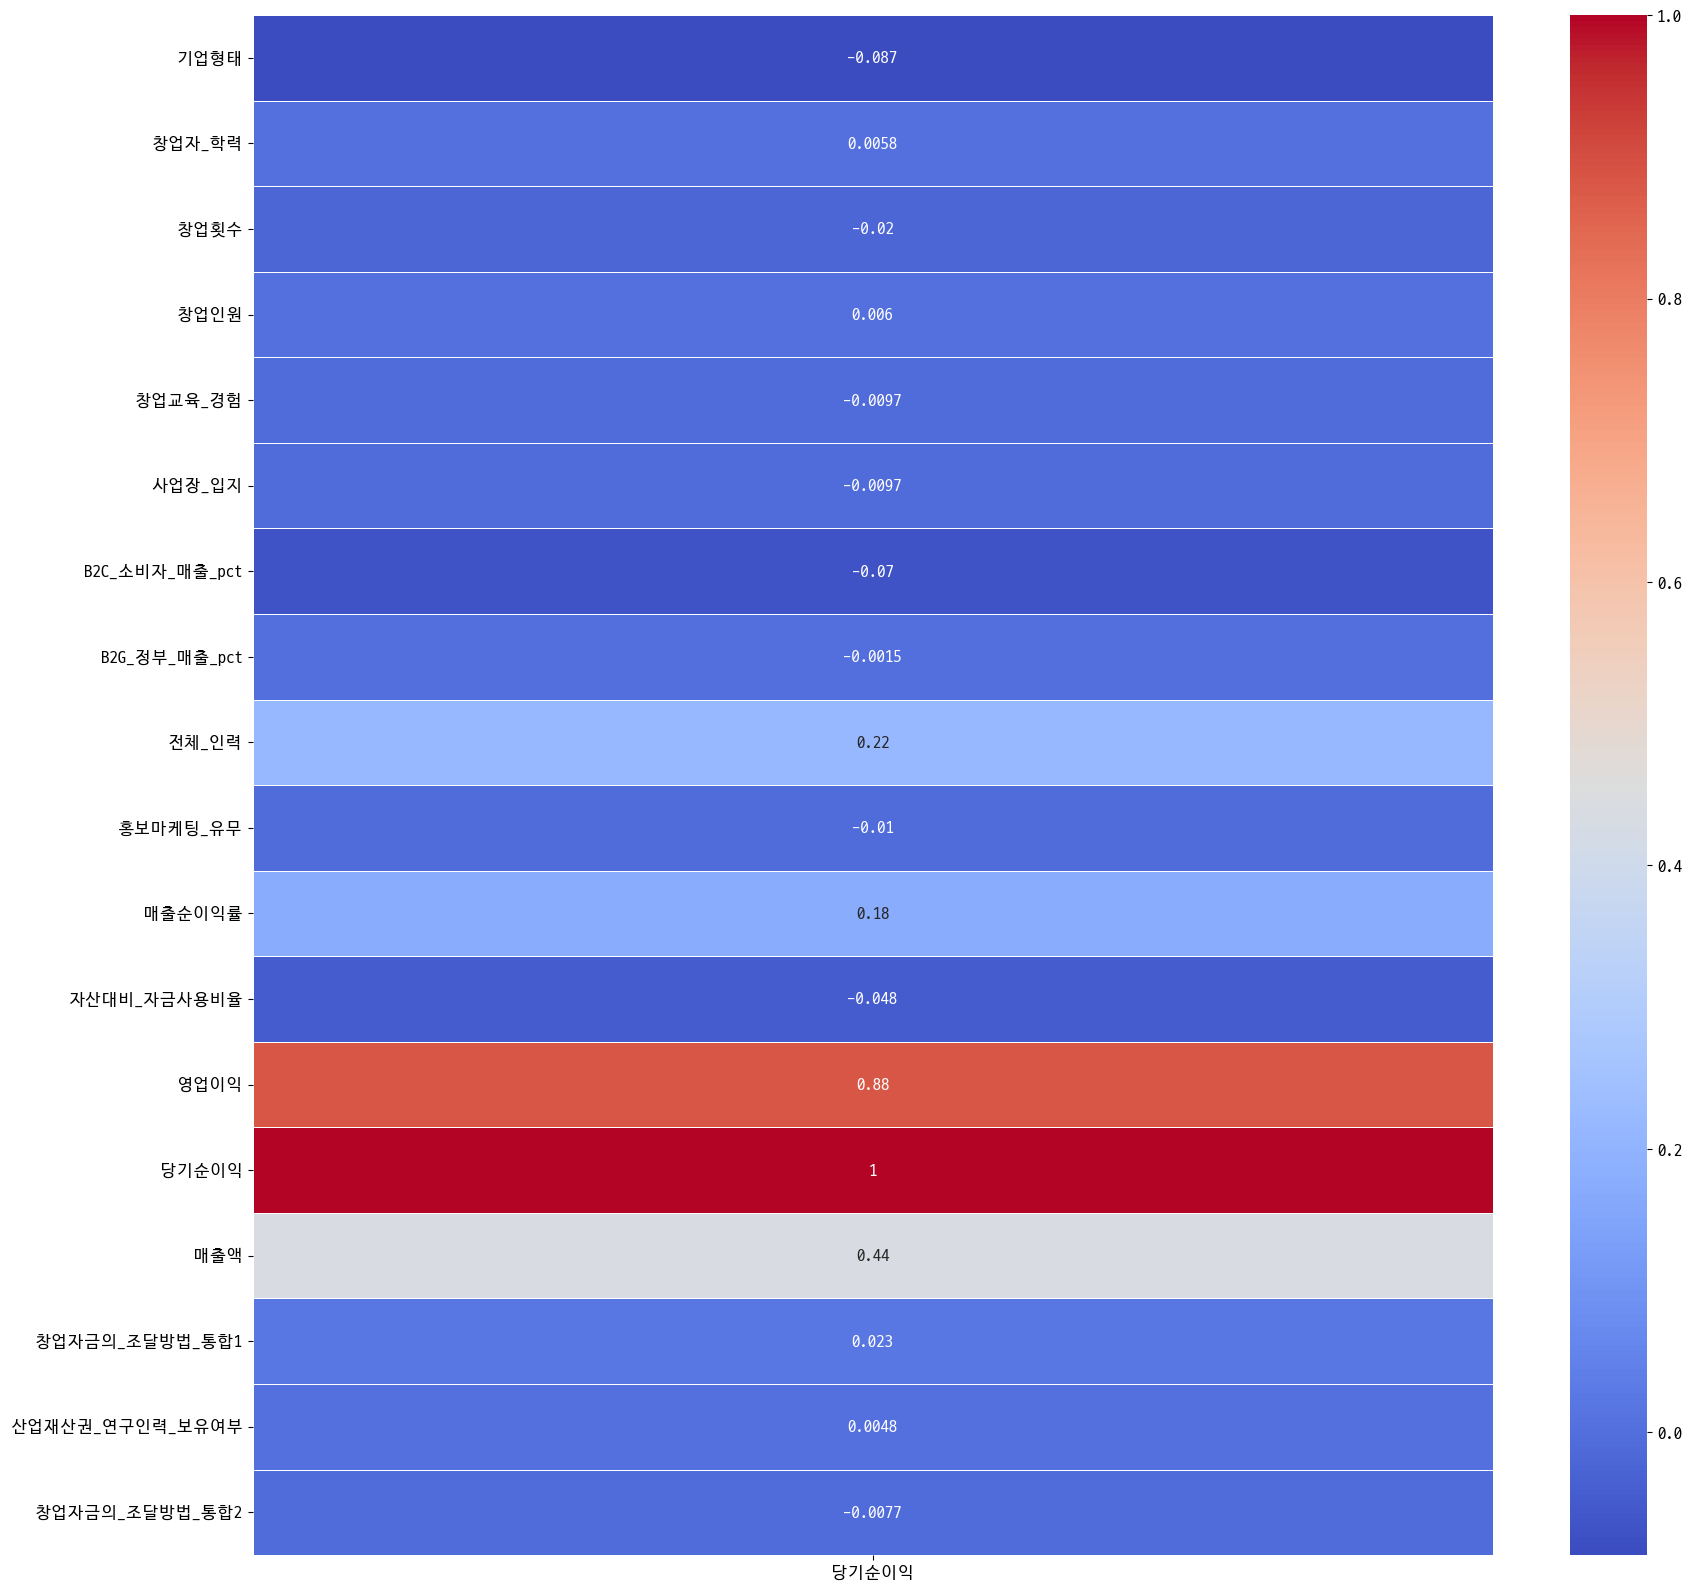

In [29]:
correlation_sales = df1.corr()['당기순이익'].to_frame()
plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7)
plt.show()

#통계적 검정

In [30]:
import statsmodels.api as sm
from patsy import dmatrices
# 회귀 분석을 위한 디자인 매트릭스 생성
y, X = dmatrices('당기순이익 ~ 기업형태 + 창업자_학력 + 창업횟수 + 창업인원 + '        
                 '창업교육_경험  + B2C_소비자_매출_pct + B2G_정부_매출_pct +영업이익+매출순이익률+매출액+'
                 '전체_인력+ 사업장_입지 + 자산대비_자금사용비율+ 전체_인력+홍보마케팅_유무 +'
                 '자산대비_자금사용비율+창업자금의_조달방법_통합1+산업재산권_연구인력_보유여부+창업자금의_조달방법_통합2',
                 data=df1, return_type="dataframe")

# 회귀 모델 피팅
model = sm.OLS(y, X)
results = model.fit()

# 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  당기순이익   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1368.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        14:01:55   Log-Likelihood:                -81264.
No. Observations:                6420   AIC:                         1.626e+05
Df Residuals:                    6402   BIC:                         1.627e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.214e+04   8179.862     

In [31]:
#df['매출순이익률']=df['매출순이익률']+4000
df.columns
num_feat=['창업자_학력', '창업횟수', '창업인원', '창업교육_경험', '사업장_입지','B2C_소비자_매출_pct',
       'B2G_정부_매출_pct', '전체_인력', '자산대비_자금사용비율', '창업자금의_조달방법_통합1','창업자금의_조달방법_통합2']

In [32]:
'''from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[num_feat]=ss.fit_transform(df[num_feat])
df[num_feat].describe()'''

'from sklearn.preprocessing import StandardScaler\nss=StandardScaler()\ndf[num_feat]=ss.fit_transform(df[num_feat])\ndf[num_feat].describe()'

In [ ]:
mpl.rc('font', size=12)
grid = gridspec.GridSpec(6, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(12, 9))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features =  ['자산대비_자금사용비율']# 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.histplot(x=feature, data=df1,legend=False, ax=ax)
    
    # 당기순이익 라인 플롯 추가 (twinx 사용)
    ax2 = ax.twinx()
    sns.regplot(x=feature, y='당기순이익', data=df1, ax=ax2, color='red')
    
    # 매출액 라인 플롯 추가 (twinx 사용)

    write_percent(ax, len(df1))  # 퍼센트 주석 추가

    # 범례(legend) 설정
    ax2.legend(['당기순이익'], loc='upper left')
plt.show()

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV

X = df1.drop(columns=['당기순이익'])
y = df1['당기순이익']

# 데이터 분할 (학습 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화
rf = RandomForestRegressor()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# radomsearchCV를 사용하여 교차 검증 및 하이퍼파라미터 튜닝

rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5, scoring='r2')
rand_search.fit(X_train, y_train)

# 최적의 모델 및 하이퍼파라미터 출력
print("Best parameters found: ", rand_search.best_params_)

# 최적의 모델로 예측
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
r2 = r2_score(y_test, y_pred)
print(f'R^2 score after hyperparameter tuning: {r2}')

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
R^2 score after hyperparameter tuning: 0.8867216742933317


In [38]:
param_grid = {
    'n_estimators': (50, 200),  # (최소, 최대)
    'max_depth': (3, 10),        # (최소, 최대)
    'min_samples_split': (2, 10),# (최소, 최대)
    'min_samples_leaf': (1, 4),  # (최소, 최대)
    'max_features': (0.1, 1.0),  # (최소, 최대)
}

# BayesSearchCV를 사용하여 하이퍼파라미터 튜닝
Bayes_clf = BayesSearchCV(rf, param_grid, scoring='r2', n_iter=50, cv=5, verbose=1)
Bayes_clf.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print('최적 하이퍼 파라미터 :', Bayes_clf.best_params_)
print('최적 정확도 :', Bayes_clf.best_score_)

# 최적의 모델을 사용하여 테스트 세트에서 예측 및 평가
best_model = Bayes_clf.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'테스트 세트에서의 RandomForest R^2 score: {r2}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [37]:
import optuna
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

def objective(trial):
    # 하이퍼파라미터 탐색 범위 지정
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 200]),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1)
    }
    model = XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return r2

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 및 R^2 점수 출력
print("Best trial:")
print("  Value: ", study.best_trial.value)
print("  Params: ")
for key, value in study.best_trial.params.items():
    print("    {}: {}".format(key, value))

# 최적의 하이퍼파라미터로 모델 재훈련 및 조정된 R^2 계산
best_params = study.best_trial.params
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# R^2 점수 계산
r2 = r2_score(y_test, y_pred)
# Adjusted R^2 점수 계산
adjusted_r2=1-((1-r2)*(149)/(150-1-41))

# 결과 출력
print(f'R^2 score: {r2}')
print(f'Adjusted R^2 score: {adjusted_r2}')

C:\Users\yeonn\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-05-23 14:07:27,315] A new study created in memory with name: no-name-3ac0e659-8628-4b8e-9e48-bc72f4068318
C:\Users\yeonn\AppData\Local\Temp\ipykernel_41524\2845254864.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1)
[I 2024-05-23 14:07:27,416] Trial 0 finished with value: 0.7710650089237718 and parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.02812216024778913}. Best is trial 0 with value: 0.7710650089237718.
C:\Users\yeonn\AppData\Local\Temp\ipykernel_41524\2845254864.py:10: FutureWar

Best trial:
  Value:  0.9103895436883329
  Params: 
    n_estimators: 200
    max_depth: 3
    learning_rate: 0.0565328730213412
R^2 score: 0.9103895436883329
Adjusted R^2 score: 0.8763707593477926
